# Task1: Restaurant Reviews

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dt = pd.read_csv('restaurants.csv')

In [11]:
print(dt["Rating text"])

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object


### Analyze the text reviews to identify the most common positive and negative keywords.

In [12]:
positive_data=dt.loc[dt['Aggregate rating']>= 2.5]
print(positive_data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [13]:
positive_keywords=positive_data['Rating text'].unique()
print(positive_keywords)

['Excellent' 'Very Good' 'Good' 'Average']


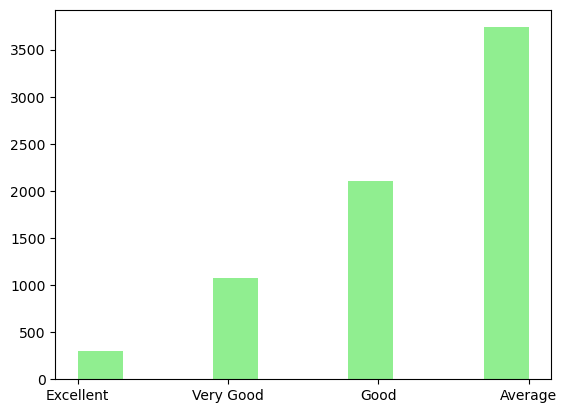

In [14]:
plt.hist(positive_data['Rating text'],label=positive_keywords,color='lightgreen')
plt.show()

In [15]:
negative_data=dt.loc[(dt['Aggregate rating']<2.5)&(dt['Aggregate rating']>0)]
print(negative_data)
negative_keywords=negative_data['Rating text'].unique()
print(negative_keywords)

      Restaurant ID                  Restaurant Name  Country Code  \
312        17374978                     Troll Tavern           216   
344        17482142              Triangle Restaurant           216   
348        16613059                       Poets Cafe            14   
613         5600961                        Pizza Hut           214   
890          311051                              KFC             1   
...             ...                              ...           ...   
9104           2979                          Chopaal             1   
9105           3237                    Club Ice Cube             1   
9106           2025  Moti Mahal Delux Tandoori Trail             1   
9306        7001208     De Fontein Belgian Beer Cafe           148   
9498        5800634          Elite Indian Restaurant           191   

             City                                            Address  \
312   Gainesville              8590 N Main St Ste B, Helen, GA 30545   
344     Mc Mill

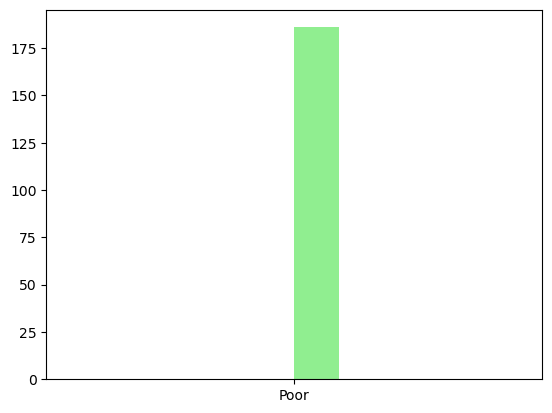

In [16]:
plt.hist(negative_data['Rating text'],label=negative_keywords,color='lightgreen')
plt.show()

### Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [21]:
dt=dt.dropna(subset=['Aggregate rating','Votes'])

In [27]:
dt['Review Length'] = dt['Review'].apply(len)
avg_length = dt['Review Length'].mean()
print(f"Average review length: {avg_length:.2f} characters")

Average review length: 45.00 characters


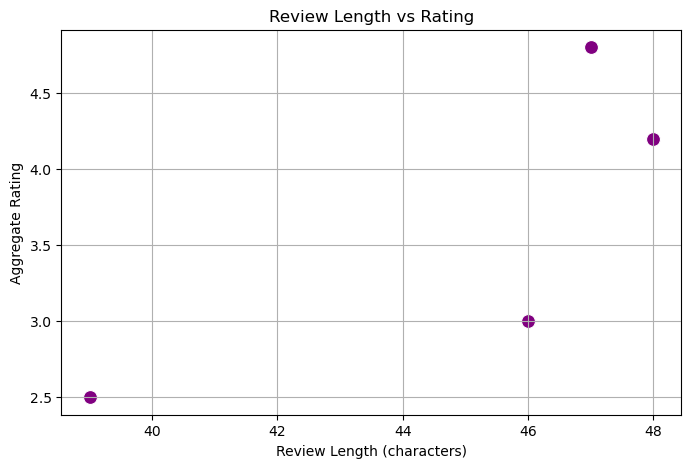

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=dt, x='Review Length', y='Aggregate rating', s=100, color='purple')
plt.title("Review Length vs Rating")
plt.xlabel("Review Length (characters)")
plt.ylabel("Aggregate Rating")
plt.grid(True)
plt.show()

In [31]:
correlation = dt['Review Length'].corr(dt['Aggregate rating'])
print(f"Relationship between review length and rating: {correlation:.2f}")

Relationship between review length and rating: 0.79
